# Troubleshoot too-good ML results with no game features

In [256]:
## Startup:

import synapseclient
from synapseclient import Project, Folder, File
import pandas as pd
import json
import pickle
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
from numpy import nan
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ranksums
%load_ext autoreload
%autoreload 2
%matplotlib inline  


## set options ##

sns.set(style="darkgrid", color_codes=True, font_scale=1.5)

# so i can see all rows of dfs
pd.set_option('display.max_columns', 500)

# so that i can print as many lines as i want
np.set_printoptions(threshold='nan') 

## import my memorytools module ##

import memorytools as mt


# Load up the memory & demographic data:

# initialize environment:
synuser = os.environ['SYNAPSE_USER']
synpass = os.environ['SYNAPSE_PASS']
mt.loadSynapseRecordsFromScratch = False
syn, memory, memorysyn, filePaths, demographics, demosyn, data = mt.create_memory_environment(synuser, synpass)
data = mt.filter_data_for_popular_phones(data)

# pull out features from games:
fromFile = True#False
toSave = False#True
data = mt.add_memory_game_features_to_data(filePaths, data, fromFile = fromFile, toSave=toSave, outFileName='memory_data_with_features.p')

# add memory composite features:
data = mt.add_composite_features_to_data(data)


from sklearn import linear_model
import sklearn
import sklearn.linear_model
import sklearn.cross_validation
import sklearn.tree
import sklearn.ensemble
import numpy as np
from sklearn.utils.validation import check_consistent_length, _num_samples
import sklearn.preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# load feature categories
fcats = mt.define_feature_categories()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Welcome, Matthew Oberhardt!
 [####################]100.00%     1/1  Done...
Downloaded   [####################]100.00%     1.9MB/1.9MB query_results.csv Done...
 [####################]100.00%     1/1  Done...
Downloaded   [####################]100.00%     2.6MB/2.6MB query_results.csv Done...
    (phones are now filtered for only the most popular ones)
memory features loaded from file: memory_data_with_features.p (input data was ignored)
Note that nyearsOffMeds = nyearsParkinsons - nyearsOnMeds
Note that nyearsOffMeds = nyearsParkinsons - nyearsOnMeds


In [257]:
from memorytools import *
agecutoff = 45

# Works too well here:

['hasParkinsons', 'age', 'education', 'phoneInfo']
Features converted to numbers:

['phoneInfo', 'education']
dropped 19 rows to remove all nas from data
na rows have been dropped (if there were any)


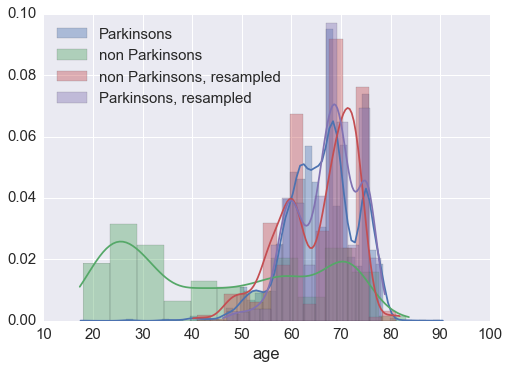

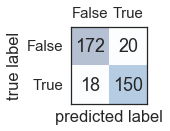



ranksum pval for dist. resampling = 0.326192618887
ranksum pval for sample balanced = 0.000902486196442


num actual positives = 600
num actual negatives = 600


###### performance #######
precision: 0.882352941176
recall: 0.892857142857
F1: 0.887573964497
training accuracy: 0.933333333333
test accuracy: 0.894444444444
random accuracy would be 0.5
##########################


[u'age' u'education' u'phoneInfo']


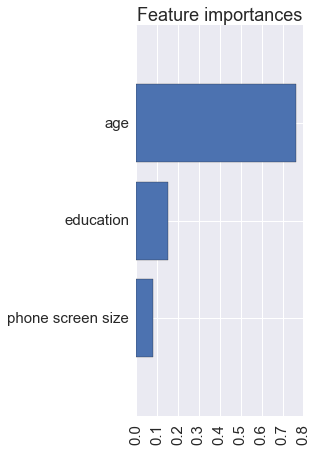

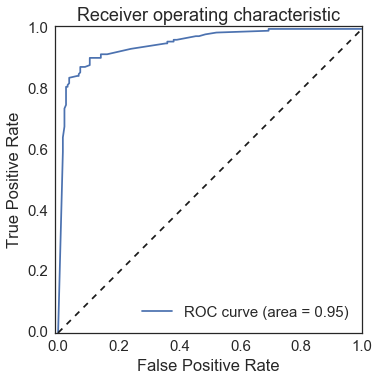

In [57]:
# Run without any of the in-game features
#features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features =                  ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
print features
MLexcludecols = []
labelcol = 'hasParkinsons'
outs = mt.build_ML_model_age_corrected_and_samplebalanced(data, features, labelcol, toPlot=[0,0,1,1,1,1], toPrint=True, MLexcludecols=MLexcludecols)    
mod, features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba, fdf = outs
print X_names

# Hypothesis: random forest is using ages (& other) as identifiers, since there are repeated vals per user
    
    

## 1. randomize the hasParkinsons labels

['hasParkinsons', 'age', 'education', 'phoneInfo']
  hasParkinsons  age
0         False   43
1         False   43
2         False   73
3         False   73
4         False   73
  hasParkinsons  age
0         False   43
1          True   43
2          True   73
3          True   73
4         False   73
Features converted to numbers:

['phoneInfo', 'education']
dropped 19 rows to remove all nas from data
na rows have been dropped (if there were any)


ranksum pval for dist. resampling = 6.71614729996e-09
ranksum pval for sample balanced = 0.269756455521


num actual positives = 600
num actual negatives = 600


###### performance #######
precision: 0.463636363636
recall: 0.607142857143
F1: 0.525773195876
training accuracy: 0.517857142857
test accuracy: 0.488888888889
random accuracy would be 0.5
##########################


[u'phoneInfo']
run on all data, after removing young folks:
removing the young folks:
(7835, 4)
(6934, 4)
na rows have been dropped (if there were any)


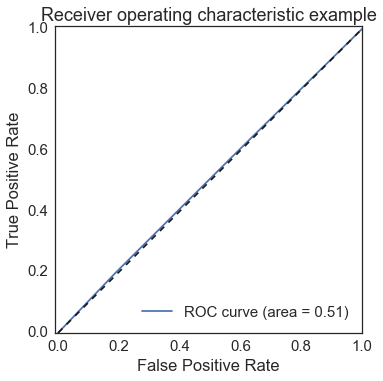

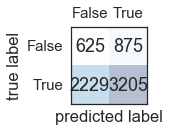

num actual positives = 5434
num actual negatives = 1500


###### performance #######
precision: 0.785539215686
recall: 0.58980493191
F1: 0.673743956275
##########################


shape of X is:  (6934, 1)


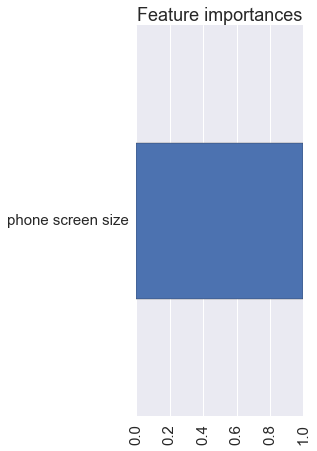

In [4]:
# Run without any of the in-game features
#features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features =                  ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
print features
MLexcludecols = ['age', 'education']
labelcol = 'hasParkinsons'

# randomly shuffle the hasParkinsons column:
data2 = data.copy()
datajunk = data.copy()
datajunk.index = np.random.permutation(datajunk.index)
data2['hasParkinsons'] = datajunk['hasParkinsons']
print data[['hasParkinsons','age']].head(5)
print data2[['hasParkinsons','age']].head(5)

outs = mt.build_ML_model_age_corrected_and_samplebalanced(data2, features, labelcol, toPlot=[0,0,0,0,0,0], toPrint=True, MLexcludecols=MLexcludecols)    
mod, features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba, fdf = outs
print X_names


# try running on all data:
print 'run on all data, after removing young folks:'
print 'removing the young folks:'

print fdf.shape
fdf = fdf[fdf['age']>agecutoff]
print fdf.shape


features_df, X_all, y_all, _X_names, _y_name, _X_train, _X_test, _y_train, _y_test = mt.prep_memory_features_for_machine_learning(fdf, features, labelcol, convert_features_to_nums=False, toStandardScale=False)

# shuffle vals:
#np.random.shuffle(X_all)


y_pred_proba_all = mod.predict_proba(X_all)[:,1]
y_pred_all = mod.predict(X_all)

mt.plot_roc_curve(y_all, y_pred_proba_all)
mt.render_confusion_matrix(y_all, y_pred_all)
mt.plot_feature_importances_randforest(mod, X_names)
len(X_all)
#print y_pred_proba_all

# print:
precision = sklearn.metrics.precision_score(y_true=y_all, y_pred=y_pred_all)
recall = sklearn.metrics.recall_score(y_true=y_all, y_pred=y_pred_all)
F1 = sklearn.metrics.f1_score(y_true=y_all, y_pred=y_pred_all)
print 'num actual positives = %s' % sum(y_all)
print 'num actual negatives = %s' % (len(y_all) - sum(y_all))
print '\n'
print '###### performance #######'
print 'precision:', precision
print 'recall:', recall
print 'F1:', F1
print '##########################'
print '\n'


print 'shape of X is: ', X_all.shape

## 2. take mean (later - for now, a single sample) of all features for each patient to remove duplicate entries

['hasParkinsons', 'age', 'education', 'phoneInfo']
Features converted to numbers:

['phoneInfo', 'education']
dropped 0 rows to remove all nas from data
na rows have been dropped (if there were any)


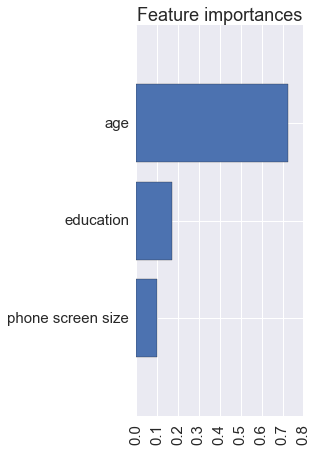

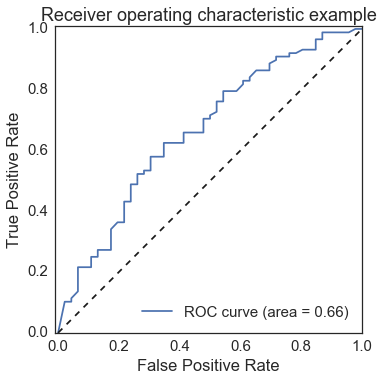

num actual positives = 302
num actual negatives = 143


###### performance #######
precision: 0.785539215686
recall: 0.58980493191
F1: 0.673743956275
training accuracy: 0.517857142857
test accuracy: 0.488888888889
random accuracy would be 0.5
##########################




In [5]:
# take only one record per patient to remove duplicates. mean is better, but that's later..

features =                  ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
print features
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
grouped = data.groupby('healthCode')
data2 = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
data2 = data2[data2['age']>agecutoff]
#outs = mt.build_ML_model_age_corrected_and_samplebalanced(data2, features, labelcol, toPlot=[0,0,0,0,0,0], toPrint=True, MLexcludecols=MLexcludecols)    
######################################################################
######################################################################

#df = data
convert_features_to_nums=False
toStandardScale=False
toPlot=[0,0,0,0,1,1]
toPrint=True


distcol = 'age'
splitcol = 'hasParkinsons'
nbins = 10
nResamples = 600

# build features dataframe:
#fdf = data[features]
fdf = data2[features]
fdf = convert_features_to_numbers(fdf)

# drop nas:
len1 = len(fdf)
fdf = fdf.dropna()
len2 = len(fdf)
print 'dropped %s rows to remove all nas from data' % (len1 - len2)


### Redo machine learning with these sets:
#df = df_resampled_np.append(df_resampled_Park)
df = fdf

# remove cols to exclude from ML (but that were needed for processing)
if len(MLexcludecols) > 0:
    for col in MLexcludecols:
        df = df.drop(col, axis=1)
        features.remove(col)

######### Machine learning #########

features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test = prep_memory_features_for_machine_learning(df, features, labelcol, convert_features_to_nums=False, toStandardScale=False)

# create model:
mod = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod.fit(X_train, y_train)

# Probabilities predicted for test set to be in + class:
y_pred_proba = mod.predict_proba(X_test)[:,1]

#  Confusion matrix:
y_pred = mod.predict(X_test)
#    sklearn.metrics.roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


######### Plotting & outputs #########

if toPlot[0] == 1:

    # plot zeroth set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    plt.legend(loc=2)
    plt.show()

if toPlot[1] == 1:
    # plot first set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    sns.distplot(df_resampled_np[distcol].dropna(), label='non Parkinsons, resampled')
    plt.legend(loc=2)
    plt.show()

if toPlot[2] == 1:
# plot second set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    sns.distplot(df_resampled_np[distcol].dropna(), label='non Parkinsons, resampled')
    sns.distplot(df_resampled_Park[distcol].dropna(), label='Parkinsons, resampled')
    plt.legend(loc=2)
    plt.show()

if toPlot[3] == 1:
    render_confusion_matrix(y_test, y_pred)

if toPlot[4] == 1:
    plot_feature_importances_randforest(mod, X_names)

if toPlot[5] == 1:
    plot_roc_curve(y_test, y_pred_proba)

if toPrint == True:
    # test pvals 1st and 2nd set:
    print 'num actual positives = %s' % sum(y)
    print 'num actual negatives = %s' % (len(y) - sum(y))
    print '\n'
    print '###### performance #######'
    print 'precision:', precision
    print 'recall:', recall
    print 'F1:', F1
    print 'training accuracy:', train_acc
    print 'test accuracy:', test_acc
    print 'random accuracy would be %s' % rand_acc
    print '##########################'
    print '\n'

######################################################################
######################################################################




## good, doesn't work. Now, add back in game score:

['game_score', 'hasParkinsons', 'age', 'education', 'phoneInfo']
Features converted to numbers:

['phoneInfo', 'education']
dropped 0 rows to remove all nas from data
na rows have been dropped (if there were any)


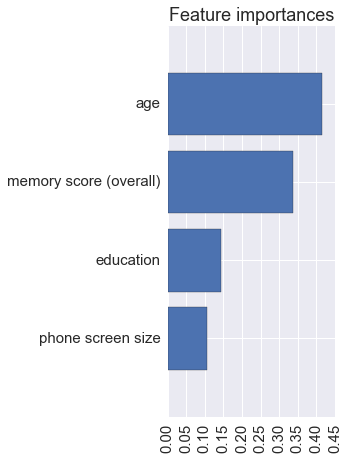

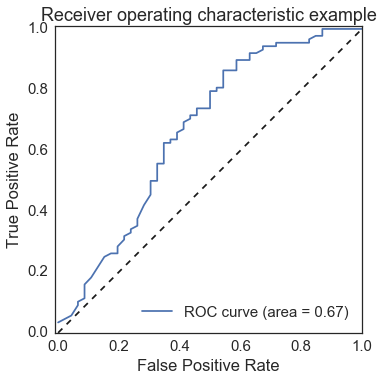

num actual positives = 302
num actual negatives = 143


###### performance #######
precision: 0.785539215686
recall: 0.58980493191
F1: 0.673743956275
training accuracy: 0.517857142857
test accuracy: 0.488888888889
random accuracy would be 0.5
##########################




In [6]:
# take only one record per patient to remove duplicates. mean is better, but that's later..

features = ['game_score'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
print features
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
grouped = data.groupby('healthCode')
data2 = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
data2 = data2[data2['age']>agecutoff]
#outs = mt.build_ML_model_age_corrected_and_samplebalanced(data2, features, labelcol, toPlot=[0,0,0,0,0,0], toPrint=True, MLexcludecols=MLexcludecols)    
######################################################################
######################################################################

#df = data
convert_features_to_nums=False
toStandardScale=False
toPlot=[0,0,0,0,1,1]
toPrint=True


distcol = 'age'
splitcol = 'hasParkinsons'
nbins = 10
nResamples = 600

# build features dataframe:
#fdf = data[features]
fdf = data2[features]
fdf = convert_features_to_numbers(fdf)

# drop nas:
len1 = len(fdf)
fdf = fdf.dropna()
len2 = len(fdf)
print 'dropped %s rows to remove all nas from data' % (len1 - len2)



## resample non-Park to same age distribution as Parkinsons:
#splitVal_resample = False
#splitVal_guide = True
#
#df_resampled, df_guide, df_resample = resample_to_match_distribution(fdf, distcol, splitcol, splitVal_resample, splitVal_guide, nbins, nResamples)
#df_resampled_np = df_resampled
#df_Parkinsons = df_guide
#df_np = df_resample
#
## test pval first set:
#a = df_resampled[distcol].dropna().values
#b = df_guide[distcol].dropna().values
#p1 = ranksums(a, b)
#
## resample Park to the resampled non-Park for sample balancing:
#fdf2 = df_resampled_np.append(df_Parkinsons)
#
#splitVal_resample = True
#splitVal_guide = False
#df_resampled, df_guide, df_resample = resample_to_match_distribution(fdf2, distcol, splitcol, splitVal_resample, splitVal_guide, nbins, nResamples)
#df_resampled_Park = df_resampled
#
## test pval 2nd set:
#a = df_resampled_np[distcol].dropna().values
#b = df_resampled_Park[distcol].dropna().values
#p2 = ranksums(a, b)


### Redo machine learning with these sets:
#df = df_resampled_np.append(df_resampled_Park)
df = fdf

# remove cols to exclude from ML (but that were needed for processing)
if len(MLexcludecols) > 0:
    for col in MLexcludecols:
        df = df.drop(col, axis=1)
        features.remove(col)

######### Machine learning #########

features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test = prep_memory_features_for_machine_learning(df, features, labelcol, convert_features_to_nums=False, toStandardScale=False)

# create model:
mod = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod.fit(X_train, y_train)

# Probabilities predicted for test set to be in + class:
y_pred_proba = mod.predict_proba(X_test)[:,1]

#  Confusion matrix:
y_pred = mod.predict(X_test)
#    sklearn.metrics.roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


######### Plotting & outputs #########

if toPlot[0] == 1:

    # plot zeroth set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    plt.legend(loc=2)
    plt.show()

if toPlot[1] == 1:
    # plot first set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    sns.distplot(df_resampled_np[distcol].dropna(), label='non Parkinsons, resampled')
    plt.legend(loc=2)
    plt.show()

if toPlot[2] == 1:
# plot second set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    sns.distplot(df_resampled_np[distcol].dropna(), label='non Parkinsons, resampled')
    sns.distplot(df_resampled_Park[distcol].dropna(), label='Parkinsons, resampled')
    plt.legend(loc=2)
    plt.show()

if toPlot[3] == 1:
    render_confusion_matrix(y_test, y_pred)

if toPlot[4] == 1:
    plot_feature_importances_randforest(mod, X_names)

if toPlot[5] == 1:
    plot_roc_curve(y_test, y_pred_proba)

if toPrint == True:
    # test pvals 1st and 2nd set:
    print 'num actual positives = %s' % sum(y)
    print 'num actual negatives = %s' % (len(y) - sum(y))
    print '\n'
    print '###### performance #######'
    print 'precision:', precision
    print 'recall:', recall
    print 'F1:', F1
    print 'training accuracy:', train_acc
    print 'test accuracy:', test_acc
    print 'random accuracy would be %s' % rand_acc
    print '##########################'
    print '\n'

######################################################################
######################################################################







## Now add in other memory game components and see how we do

['game_numFails', 'game_score', 'game_numGames', '9_numsuccesses', '9_numunsuccesses', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '9_meansuccessfuldist', '16_firstdist', '16_meandist', '16_numsuccesses', '16_gamescore', '16_latency', '16_numunsuccesses', '16_successful', '16_meanDt', '16_meansuccessfuldist', 'played_game4', 'hasParkinsons', 'age', 'education', 'phoneInfo']
Features converted to numbers:

['phoneInfo', 'education']
dropped 30 rows to remove all nas from data
na rows have been dropped (if there were any)


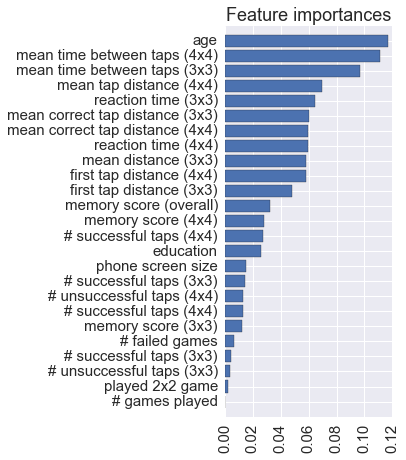

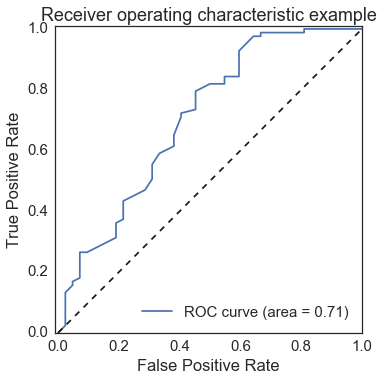

num actual positives = 276
num actual negatives = 139


###### performance #######
precision: 0.785539215686
recall: 0.58980493191
F1: 0.673743956275
training accuracy: 0.517857142857
test accuracy: 0.488888888889
random accuracy would be 0.5
##########################




In [7]:
# take only one record per patient to remove duplicates. mean is better, but that's later..

#features = ['9_meanDt'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
print features
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
grouped = data.groupby('healthCode')
data2 = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
data2 = data2[data2['age']>agecutoff]
#outs = mt.build_ML_model_age_corrected_and_samplebalanced(data2, features, labelcol, toPlot=[0,0,0,0,0,0], toPrint=True, MLexcludecols=MLexcludecols)    
######################################################################
######################################################################

#df = data
convert_features_to_nums=False
toStandardScale=False
toPlot=[0,0,0,0,1,1]
toPrint=True


distcol = 'age'
splitcol = 'hasParkinsons'
nbins = 10
nResamples = 600

# build features dataframe:
#fdf = data[features]
fdf = data2[features]
fdf = convert_features_to_numbers(fdf)

# drop nas:
len1 = len(fdf)
fdf = fdf.dropna()
len2 = len(fdf)
print 'dropped %s rows to remove all nas from data' % (len1 - len2)




### Redo machine learning with these sets:
#df = df_resampled_np.append(df_resampled_Park)
df = fdf

# remove cols to exclude from ML (but that were needed for processing)
if len(MLexcludecols) > 0:
    for col in MLexcludecols:
        df = df.drop(col, axis=1)
        features.remove(col)

######### Machine learning #########

features_df, X, y, X_names, y_name, X_train, X_test, y_train, y_test = prep_memory_features_for_machine_learning(df, features, labelcol, convert_features_to_nums=False, toStandardScale=False)

# create model:
mod = RandomForestClassifier(n_estimators=100)
#lr = linear_model.LogisticRegression(penalty='l1', C=0.1) # with regularization
mod.fit(X_train, y_train)

# Probabilities predicted for test set to be in + class:
y_pred_proba = mod.predict_proba(X_test)[:,1]

#  Confusion matrix:
y_pred = mod.predict(X_test)
#    sklearn.metrics.roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


######### Plotting & outputs #########

if toPlot[0] == 1:

    # plot zeroth set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    plt.legend(loc=2)
    plt.show()

if toPlot[1] == 1:
    # plot first set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    sns.distplot(df_resampled_np[distcol].dropna(), label='non Parkinsons, resampled')
    plt.legend(loc=2)
    plt.show()

if toPlot[2] == 1:
# plot second set:
    plt.figure()
    sns.distplot(df_Parkinsons[distcol].dropna(), label='Parkinsons')
    sns.distplot(df_np[distcol].dropna(), label='non Parkinsons')
    sns.distplot(df_resampled_np[distcol].dropna(), label='non Parkinsons, resampled')
    sns.distplot(df_resampled_Park[distcol].dropna(), label='Parkinsons, resampled')
    plt.legend(loc=2)
    plt.show()

if toPlot[3] == 1:
    render_confusion_matrix(y_test, y_pred)

if toPlot[4] == 1:
    plot_feature_importances_randforest(mod, X_names)

if toPlot[5] == 1:
    plot_roc_curve(y_test, y_pred_proba)

if toPrint == True:
    # test pvals 1st and 2nd set:
    print 'num actual positives = %s' % sum(y)
    print 'num actual negatives = %s' % (len(y) - sum(y))
    print '\n'
    print '###### performance #######'
    print 'precision:', precision
    print 'recall:', recall
    print 'F1:', F1
    print 'training accuracy:', train_acc
    print 'test accuracy:', test_acc
    print 'random accuracy would be %s' % rand_acc
    print '##########################'
    print '\n'

######################################################################
######################################################################






In [8]:
# that worked..

## Run same test as above with simplified code (one sample per patient, all features):

['game_numFails', 'game_score', 'game_numGames', '9_numsuccesses', '9_numunsuccesses', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '9_meansuccessfuldist', '16_firstdist', '16_meandist', '16_numsuccesses', '16_gamescore', '16_latency', '16_numunsuccesses', '16_successful', '16_meanDt', '16_meansuccessfuldist', 'played_game4', 'hasParkinsons', 'age', 'education', 'phoneInfo']
Features converted to numbers:

['phoneInfo', 'education']
dropped 30 rows to remove all nas from data
na rows have been dropped (if there were any)


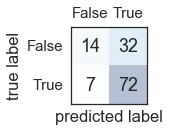



num actual positives = 276
num actual negatives = 139


###### performance #######
precision: 0.692307692308
recall: 0.911392405063
F1: 0.786885245902
training accuracy: 1.0
test accuracy: 0.688
random accuracy would be 0.665060240964
##########################




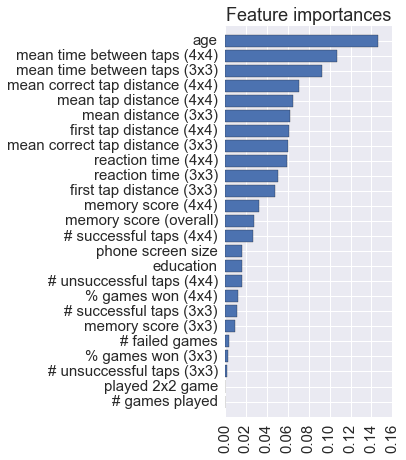

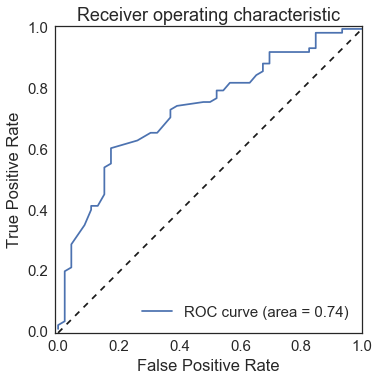

In [202]:
# simplified code when not sample balancing:
# (with other memory features)

# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
print features
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
grouped = data.groupby('healthCode')
datasample = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
datasample = datasample[datasample['age']>agecutoff]

outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[1,1,1], toPrint=True, MLexcludecols=MLexcludecols)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   




## mean values per patient, all features:

Features converted to numbers:

['phoneInfo', 'education']
dropped 256 rows to remove all nas from data
# left in labelcol:  290.0
# total in labelcol:  430
na rows have been dropped (if there were any)


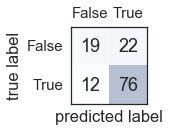



num actual positives = 290.0
num actual negatives = 140.0


###### performance #######
precision: 0.775510204082
recall: 0.863636363636
F1: 0.817204301075
training accuracy: 1.0
test accuracy: 0.736434108527
random accuracy would be 0.674418604651
##########################




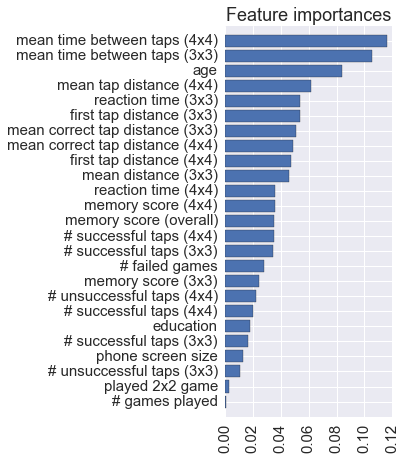

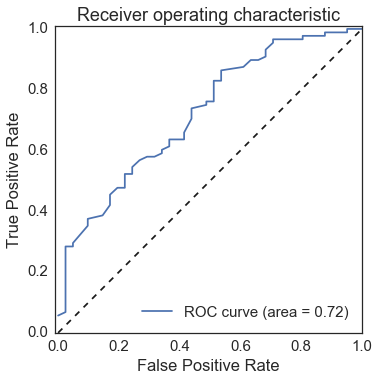

In [56]:
# simplified code when not sample balancing:
# (with other memory features)

# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone'] + ['healthCode']
features.remove('smartphone')
features.remove('gender')
#print features
featureToMean = ['healthCode'] # don't need to also exclude - this step takes care of that too.
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
#grouped = data.groupby('healthCode')
#datasample = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
datasample = data[data['age']>agecutoff]

outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[1,1,1], toPrint=True, MLexcludecols=MLexcludecols, modelType='randomforest', featureToMean=featureToMean)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   





## mean values per patient, all features except age

Features converted to numbers:

['phoneInfo', 'education']
dropped 256 rows to remove all nas from data
# left in labelcol:  290.0
# total in labelcol:  430
na rows have been dropped (if there were any)


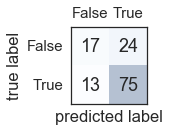



num actual positives = 290.0
num actual negatives = 140.0


###### performance #######
precision: 0.757575757576
recall: 0.852272727273
F1: 0.802139037433
training accuracy: 1.0
test accuracy: 0.713178294574
random accuracy would be 0.674418604651
##########################




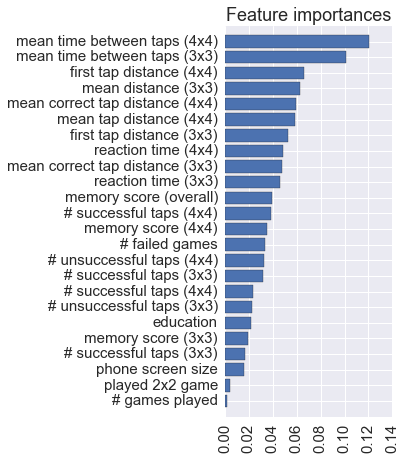

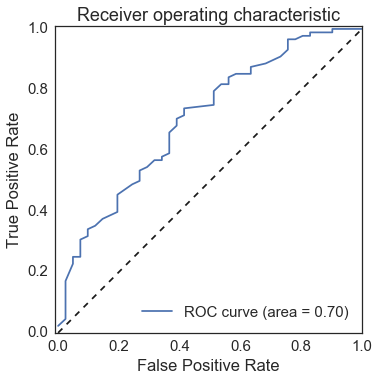

In [55]:
# simplified code when not sample balancing:
# (with other memory features)

# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone'] + ['healthCode']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
#print features
featureToMean = ['healthCode'] # don't need to also exclude - this step takes care of that too.
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
#grouped = data.groupby('healthCode')
#datasample = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
datasample = data[data['age']>agecutoff]

outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[1,1,1], toPrint=True, MLexcludecols=MLexcludecols, modelType='randomforest', featureToMean=featureToMean)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   



### mean values per patient, all features except age, logistic regression

Features converted to numbers:
['phoneInfo', 'education']
dropped 256 rows to remove all nas from data
# positive in labelcol:  290.0
# total in labelcol:  430
na rows have been dropped (if there were any)


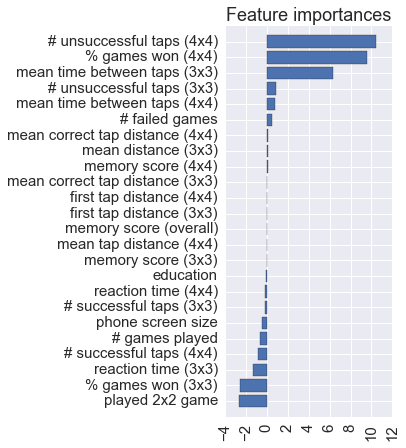

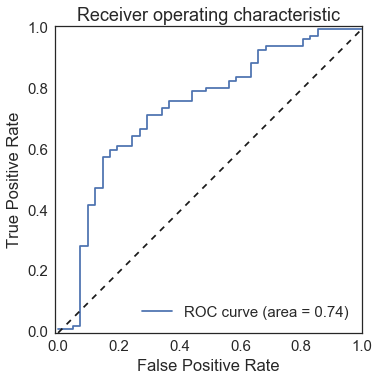

In [255]:
# simplified code when not sample balancing:
# (with other memory features)

# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone'] + ['healthCode']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
#print features
featureToMean = ['healthCode'] # don't need to also exclude - this step takes care of that too.
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
#grouped = data.groupby('healthCode')
#datasample = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
datasample = data[data['age']>agecutoff]

outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[0,1,1], toPrint=False, MLexcludecols=MLexcludecols, modelType='logisticregression', featureToMean=featureToMean)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   



## mean values per patient, only demographic features

Features converted to numbers:

['phoneInfo', 'education']
dropped 0 rows to remove all nas from data
na rows have been dropped (if there were any)


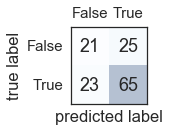

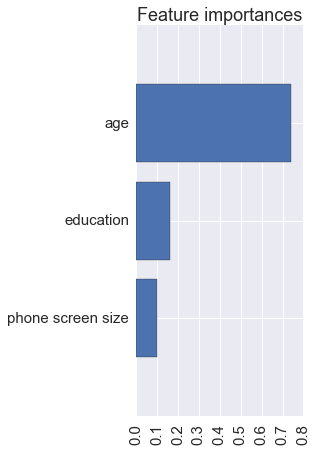

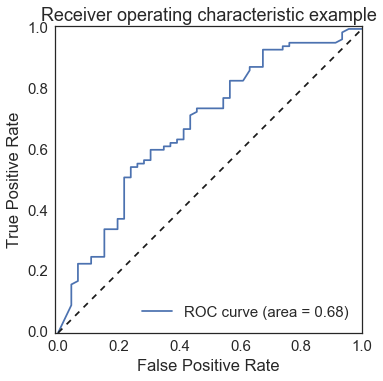



num actual positives = 302.0
num actual negatives = 143.0


###### performance #######
precision: 0.722222222222
recall: 0.738636363636
F1: 0.730337078652
training accuracy: 0.890675241158
test accuracy: 0.641791044776
random accuracy would be 0.678651685393
##########################




In [15]:
# simplified code when not sample balancing:
# (with other memory features)

# take only one record per patient to remove duplicates. mean is better, but that's later..

features = ['hasParkinsons'] + fcats['demographic'] + fcats['phone'] + ['healthCode']
features.remove('smartphone')
features.remove('gender')
#print features
featureToMean = ['healthCode'] # don't need to also exclude - this step takes care of that too.
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
#grouped = data.groupby('healthCode')
#datasample = grouped.apply(lambda x: x.sample(n=1))

# remove young patients:
datasample = data[data['age']>agecutoff]

outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[1,1,1], toPrint=True, MLexcludecols=MLexcludecols, modelType='randomforest', featureToMean=featureToMean)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   




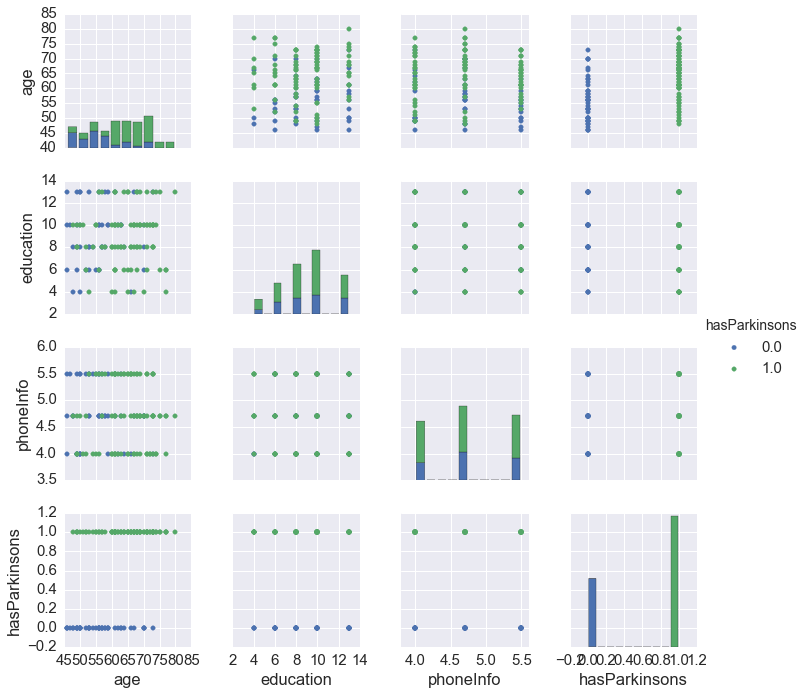

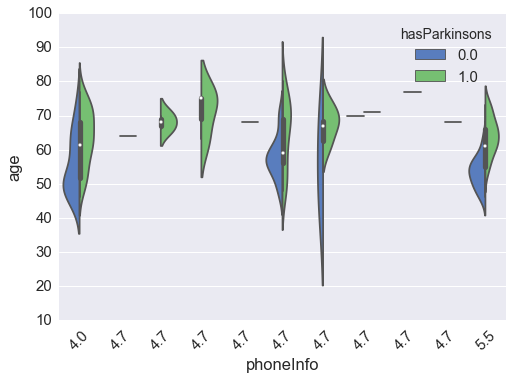

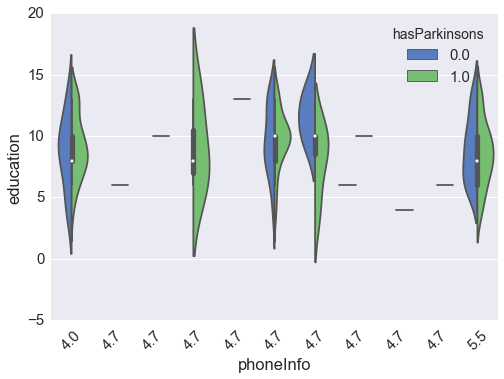

In [12]:
# visualize the feature distributions:
dftest = pd.DataFrame()
for i, name in enumerate(X_names):
    dftest[name] = X_test[:,i]

dftest['hasParkinsons'] = y_test
features_df = dftest

g = sns.PairGrid(features_df, hue="hasParkinsons")
g = g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist)
g = g.add_legend()

yvar = 'hasParkinsons'
catvars = ['phoneInfo']
freqvars = ['age', 'education']
for freqvar in freqvars:
    for catvar in catvars:
        plt.figure()
        ax1 = sns.violinplot(x=catvar, y=freqvar, hue=yvar, data=features_df, palette="muted", split=True)    
        plt.xticks(rotation=45)

## add back in resampling of non-parkinsons for age, along with means?

Features converted to numbers:

['phoneInfo', 'education']
dropped 0 rows to remove all nas from data
# left in labelcol:  302.0
# total in labelcol:  445
pval for resampling (want nonsignificant):  2.85017692414e-06
na rows have been dropped (if there were any)


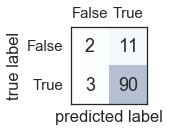

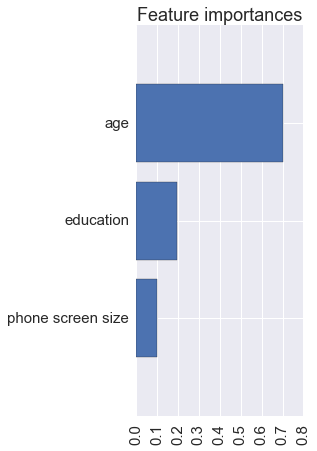

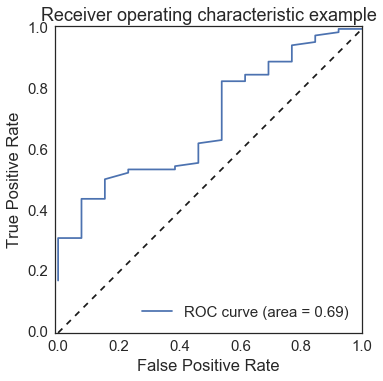



num actual positives = 302.0
num actual negatives = 50.0


###### performance #######
precision: 0.891089108911
recall: 0.967741935484
F1: 0.927835051546
training accuracy: 0.943089430894
test accuracy: 0.867924528302
random accuracy would be 0.857954545455
##########################




In [39]:
# Only demographic features:

# simplified code when not sample balancing:
# (with other memory features)

# take only one record per patient to remove duplicates. mean is better, but that's later..

features = ['hasParkinsons'] + fcats['demographic'] + fcats['phone'] + ['healthCode']
features.remove('smartphone')
features.remove('gender')
#print features
featureToMean = ['healthCode'] # don't need to also exclude - this step takes care of that too.
MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
#grouped = data.groupby('healthCode')
#datasample = grouped.apply(lambda x: x.sample(n=1))

# remove young patients:
datasample = data[data['age']>agecutoff]
# 143 non-Parkinsons and 302 Parkinsons left after age cutoff
Params = mt.sampleBalanceDefaultParams
Params['nResamples'] = 50
Params['nbins'] = 5
outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[1,1,1], toPrint=True, MLexcludecols=MLexcludecols, modelType='randomforest', featureToMean=featureToMean, sampleBalance=True, sampleBalanceParams=Params)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   

# doesn't help.. there are too few samples.


## One sample per patient, all but remove age

Features converted to numbers:

['phoneInfo', 'education']
dropped 28 rows to remove all nas from data
na rows have been dropped (if there were any)


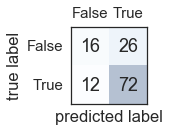

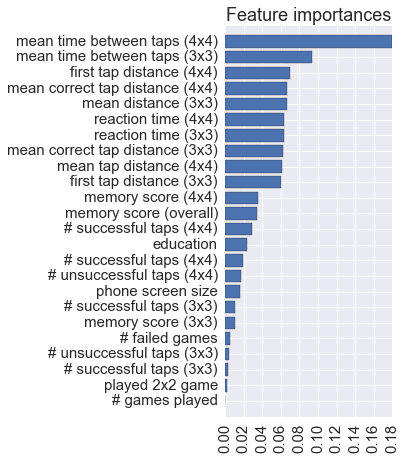

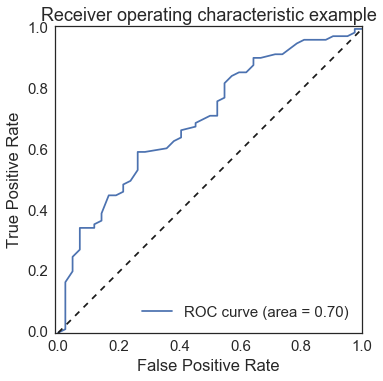



num actual positives = 277
num actual negatives = 140


###### performance #######
precision: 0.734693877551
recall: 0.857142857143
F1: 0.791208791209
training accuracy: 1.0
test accuracy: 0.698412698413
random accuracy would be 0.664268585132
##########################




In [41]:
# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
features.remove('age')

MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
grouped = data.groupby('healthCode')
datasample = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
datasample = datasample[datasample['age']>agecutoff]

outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[1,1,1], toPrint=True, MLexcludecols=MLexcludecols)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   




## One sample per patient, demographic but remove age

Features converted to numbers:

['gender', 'phoneInfo', 'education']
dropped 0 rows to remove all nas from data
na rows have been dropped (if there were any)
[ 0.18155124  0.50176914  0.31667962]


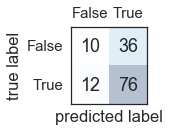



num actual positives = 302
num actual negatives = 143


###### performance #######
precision: 0.678571428571
recall: 0.863636363636
F1: 0.76
training accuracy: 0.710610932476
test accuracy: 0.641791044776
random accuracy would be 0.678651685393
##########################




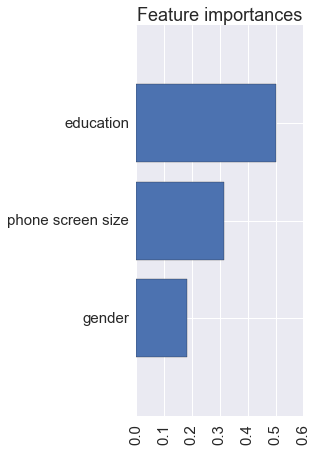

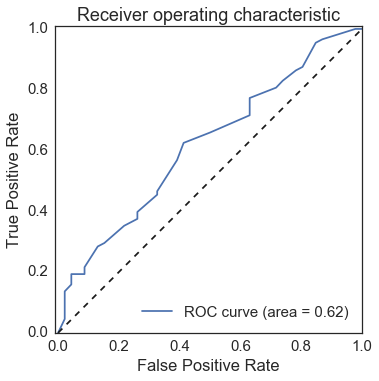

In [99]:
# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..

features =  ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
#features.remove('gender')
features.remove('age')

MLexcludecols = []
labelcol = 'hasParkinsons'

# redo data so i take 1 sample of each patient.
grouped = data.groupby('healthCode')
datasample = grouped.apply(lambda x: x.sample(n=1))
# remove young patients:
datasample = datasample[datasample['age']>agecutoff]

outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[1,1,1], toPrint=True, MLexcludecols=MLexcludecols)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   


## One sample per patient, run as a loop (all features, but no age) (will unpack & use for plotting rocs 

In [53]:
# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..
features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
MLexcludecols = []
labelcol = 'hasParkinsons'

# aggregate lists:
models = []
train_accs = []
y_tests = []
y_pred_probas = []

nIters = 10
for iter in range(nIters):
    print 'starting iter ', iter
    # redo data so i take 1 sample of each patient.
    grouped = data.groupby('healthCode')
    datasample = grouped.apply(lambda x: x.sample(n=1))
    # remove young patients:
    datasample = datasample[datasample['age']>agecutoff]
    # run model:
    with suppress_stdout():
        outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[0,0,0], toPrint=False, MLexcludecols=MLexcludecols)
    model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
    # capture results:
    models.append(model)
    train_accs.append(train_acc)
    y_tests.append(y_test)
    y_pred_probas.append(y_pred_proba)
    



starting iter  0
starting iter  1
starting iter  2
starting iter  3
starting iter  4
starting iter  5
starting iter  6
starting iter  7
starting iter  8
starting iter  9


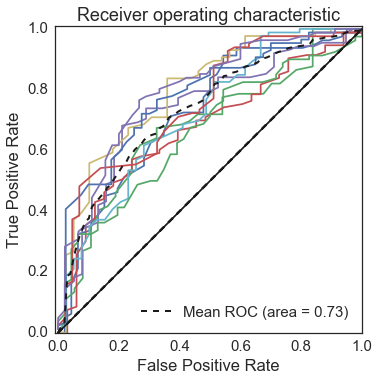

In [54]:
# plot the ROCs:
mt.plot_roc_curves_with_mean(y_tests, y_pred_probas)

## One sample per patient, run as a loop (all features, but no age) (will unpack & use for plotting rocs . Logistic regression

In [68]:
# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..
features = fcats['game'] + ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
MLexcludecols = []
labelcol = 'hasParkinsons'

# aggregate lists:
models = []
train_accs = []
y_tests = []
y_pred_probas = []

nIters = 10
for iter in range(nIters):
    print 'starting iter ', iter
    # redo data so i take 1 sample of each patient.
    grouped = data.groupby('healthCode')
    datasample = grouped.apply(lambda x: x.sample(n=1))
    # remove young patients:
    datasample = datasample[datasample['age']>agecutoff]
    # run model:
    with suppress_stdout():
        outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[0,0,0], toPrint=False, MLexcludecols=MLexcludecols, modelType='logisticregression')
    model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
    # capture results:
    models.append(model)
    train_accs.append(train_acc)
    y_tests.append(y_test)
    y_pred_probas.append(y_pred_proba)
    

starting iter  0
starting iter  1
starting iter  2
starting iter  3
starting iter  4
starting iter  5
starting iter  6
starting iter  7
starting iter  8
starting iter  9


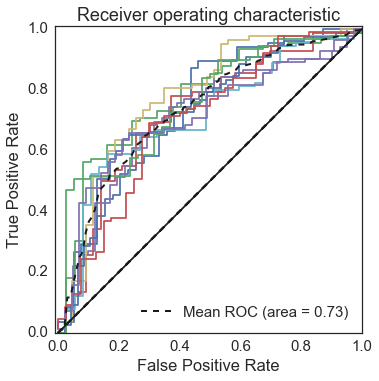

In [69]:
# plot the ROCs:
mt.plot_roc_curves_with_mean(y_tests, y_pred_probas)

## One sample per patient, run as a loop (only demographic features, but no age) (will unpack & use for plotting rocs . Logistic regression

In [251]:
# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..
features = ['hasParkinsons'] + fcats['demographic'] + fcats['phone']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
MLexcludecols = []
labelcol = 'hasParkinsons'

# aggregate lists:
models = []
train_accs = []
y_tests = []
y_pred_probas = []

nIters = 10
for iter in range(nIters):
    print 'starting iter ', iter
    # redo data so i take 1 sample of each patient.
    grouped = data.groupby('healthCode')
    datasample = grouped.apply(lambda x: x.sample(n=1))
    # remove young patients:
    datasample = datasample[datasample['age']>agecutoff]
    # run model:
    with suppress_stdout():
        outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[0,0,0], toPrint=False, MLexcludecols=MLexcludecols, modelType='logisticregression')
    model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
    # capture results:
    models.append(model)
    train_accs.append(train_acc)
    y_tests.append(y_test)
    y_pred_probas.append(y_pred_proba)

starting iter  0
starting iter  1
starting iter  2
starting iter  3
starting iter  4
starting iter  5
starting iter  6
starting iter  7
starting iter  8
starting iter  9


['hasParkinsons', 'education', 'phoneInfo']


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


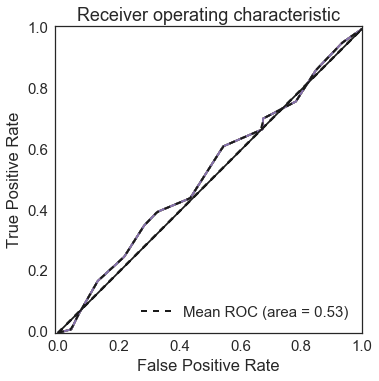

In [252]:
print features
# plot the ROCs:
mt.plot_roc_curves_with_mean(y_tests, y_pred_probas)

## one sample per patient, all features but no age. use mean per patient. logistic regression

Features converted to numbers:
['gender', 'phoneInfo', 'education']
dropped 0 rows to remove all nas from data
# positive in labelcol:  302.0
# total in labelcol:  445
na rows have been dropped (if there were any)


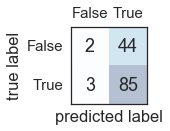



num actual positives = 302.0
num actual negatives = 143.0


###### performance #######
precision: 0.658914728682
recall: 0.965909090909
F1: 0.783410138249
training accuracy: 0.684887459807
test accuracy: 0.649253731343
random accuracy would be 0.678651685393
##########################


['hasParkinsons', 'gender', 'education', 'phoneInfo']


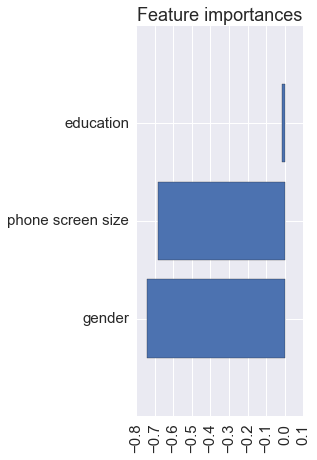

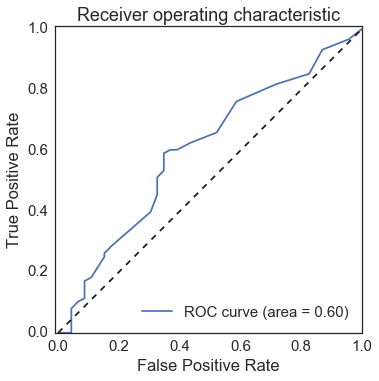

In [250]:
# logistic regression, mean values

# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..

features = ['hasParkinsons'] + fcats['demographic'] + fcats['phone'] + ['healthCode']
features.remove('smartphone')
#features.remove('gender')
features.remove('age')
featureToMean = ['healthCode']
MLexcludecols = []
labelcol = 'hasParkinsons'

# remove young patients:
datasample = data[data['age']>agecutoff]

outs = mt.build_ML_model(datasample, features, labelcol=labelcol, toPlot=[1,1,1], toPrint=True, MLexcludecols=MLexcludecols, modelType='logisticregression', featureToMean=featureToMean)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
print features

In [71]:
model.coef_

array([[  5.06172058e-01,  -4.34703884e-03,  -5.23942963e-01,
         -2.07531484e-01,   1.13641375e+00,   1.24165373e-01,
         -2.57835134e+00,  -2.05155013e-02,  -1.35174487e+00,
          6.85097296e-03,   6.38029536e+00,   3.07910379e-02,
          2.78854824e-02,  -2.02633071e-02,  -8.06728225e-01,
          7.62736611e-02,  -1.92679925e-01,   1.07214828e+01,
          9.87001329e+00,   7.93230127e-01,   1.37034454e-01,
         -2.62121925e+00,  -9.88107572e-02,  -4.28598612e-01]])

In [ ]:
# play with the coef, and do l2.. get plot working!

# try logistic regression on all the analyses

## Predict whether meds are working for Parkinson's patients:

### 1st method: predict across all patients, taking mean values for tookmeds and didn't take meds for each person (doesn't work)

Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
shape of current dataframe:  (354, 60)
188.0
354
['game_score', '9_numsuccesses', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '9_meansuccessfuldist', '16_firstdist', '16_meandist', '16_numsuccesses', '16_gamescore', '16_latency', '16_successful', '16_meanDt', '16_meansuccessfuldist', 'played_game4', 'education', 'phoneInfo', 'medTimepoint']
Features converted to numbers:
[]
dropped 15 rows to remove all nas from data
na rows have been dropped (if there were any)


num actual positives = 169.0
num actual negatives = 154.0


###### performance #######
precision: 0.557692307692
recall: 0.557692307692
F1: 0.557692307692
training accuracy: 0.606194690265
test accuracy: 0.525773195876
random accuracy would be 0.523219814241
##########################




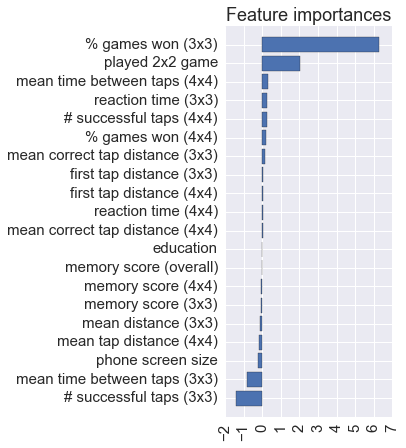

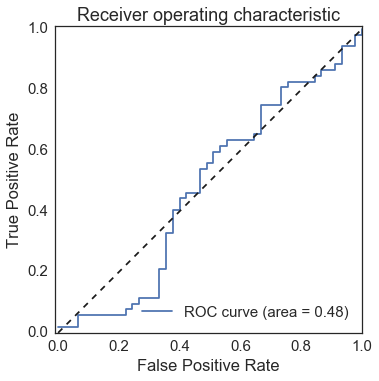

In [258]:
### 1st method: predict across all patients, taking mean values for tookmeds and didn't take meds for each person (doesn't work)
labelcol = 'medTimepoint'
label_T = True
label_F = False
df = data

# 1. take parkinsons cohort
dfmed = df[df['hasParkinsons']==True].copy()

# 2. convert medTimePoint to #'s:
dfmed = mt.convert_features_to_numbers(dfmed)#, featuresToConvert=['medTimepoint'])

# 3. remove the ones that are nan in the medTimePoint column
dfmed = dfmed[dfmed[labelcol].notnull()]

# 4. split into yes and no took meds (medTimePoint) dfs
dfmed_T = dfmed[dfmed[labelcol]==label_T]
dfmed_F = dfmed[dfmed[labelcol]==label_F]

## 5. in each group, take mean (or 1 sample) per patient
dfmed_T = mt.groupby_col_and_avg_other_cols(dfmed_T, 'healthCode', keepColinDf=True)
dfmed_F = mt.groupby_col_and_avg_other_cols(dfmed_F, 'healthCode', keepColinDf=True)

# 6. recombine the mean/sampled datasets (& redo index so it's unique)
#dfmed_T['education']
dfmed = dfmed_T.append(dfmed_F)
dfmed.index = range(len(dfmed))
# 7. only include patients that have both states??

# 8. put into machine learning to predict medTimePoint
print 'shape of current dataframe: ', dfmed.shape

print dfmed[labelcol].sum()
print len(dfmed[labelcol])


# logistic regression, mean values

# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + fcats['demographic'] + fcats['phone'] + ['medTimepoint']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
features.remove('16_numunsuccesses')
features.remove('9_numunsuccesses')
features.remove('game_numGames')
features.remove('game_numFails')
MLexcludecols = []
print features
# remove young patients:
dfmedsample = dfmed[dfmed['age']>agecutoff]
dfmedsample.shape


outs = mt.build_ML_model(dfmedsample, features, labelcol=labelcol, toPlot=[0,1,1], toPrint=True, MLexcludecols=MLexcludecols, modelType='logisticregression')
#model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
#print features


### 1.1th method: predict across all patients, taking mean values for tookmeds and didn't take meds for each person. Only include patients with very fast or very slow times between taps (3x3)

Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
shape of current dataframe:  (149, 60)
78.0
149
['game_score', '9_numsuccesses', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '9_meansuccessfuldist', '16_firstdist', '16_meandist', '16_numsuccesses', '16_gamescore', '16_latency', '16_successful', '16_meanDt', '16_meansuccessfuldist', 'played_game4', 'education', 'phoneInfo', 'medTimepoint']
Features converted to numbers:
[]
dropped 10 rows to remove all nas from data
na rows have been dropped (if there were any)


num actual positives = 71.0
num actual negatives = 62.0


###### performance #######
precision: 0.565217391304
recall: 0.619047619048
F1: 0.590909090909
training accuracy: 0.720430107527
test accuracy: 0.55
random accuracy would be 0.533834586466
##########################




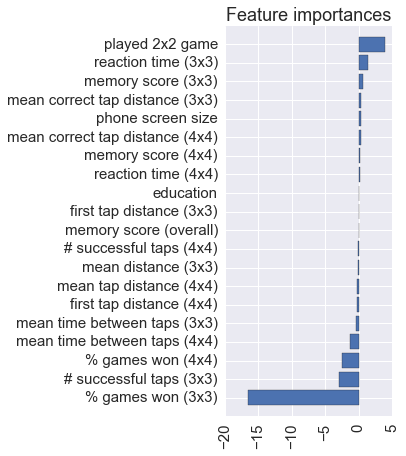

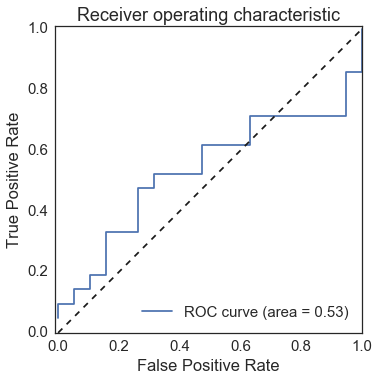

In [264]:
tCutLo = 0.4
tCutHi = 1

### 1st method: predict across all patients, taking mean values for tookmeds and didn't take meds for each person (doesn't work)
labelcol = 'medTimepoint'
label_T = True
label_F = False
df = data

# 0. take only records with slow or fast times between taps
dfHi = df[df['9_meanDt']>=tCutHi]
dfLo = df[df['9_meanDt']<=tCutLo]

df = dfHi.append(dfLo)


# 1. take parkinsons cohort
dfmed = df[df['hasParkinsons']==True].copy()

# 2. convert medTimePoint to #'s:
dfmed = mt.convert_features_to_numbers(dfmed)#, featuresToConvert=['medTimepoint'])

# 3. remove the ones that are nan in the medTimePoint column
dfmed = dfmed[dfmed[labelcol].notnull()]

# 4. split into yes and no took meds (medTimePoint) dfs
dfmed_T = dfmed[dfmed[labelcol]==label_T]
dfmed_F = dfmed[dfmed[labelcol]==label_F]

## 5. in each group, take mean (or 1 sample) per patient
dfmed_T = mt.groupby_col_and_avg_other_cols(dfmed_T, 'healthCode', keepColinDf=True)
dfmed_F = mt.groupby_col_and_avg_other_cols(dfmed_F, 'healthCode', keepColinDf=True)

# 6. recombine the mean/sampled datasets (& redo index so it's unique)
#dfmed_T['education']
dfmed = dfmed_T.append(dfmed_F)
dfmed.index = range(len(dfmed))
# 7. only include patients that have both states??

# 8. put into machine learning to predict medTimePoint
print 'shape of current dataframe: ', dfmed.shape

print dfmed[labelcol].sum()
print len(dfmed[labelcol])


# logistic regression, mean values

# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + fcats['demographic'] + fcats['phone'] + ['medTimepoint']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
features.remove('16_numunsuccesses')
features.remove('9_numunsuccesses')
features.remove('game_numGames')
features.remove('game_numFails')
MLexcludecols = []
print features
# remove young patients:
dfmedsample = dfmed[dfmed['age']>agecutoff]
dfmedsample.shape


outs = mt.build_ML_model(dfmedsample, features, labelcol=labelcol, toPlot=[0,1,1], toPrint=True, MLexcludecols=MLexcludecols, modelType='logisticregression')
#model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
#print features


### 1.5th method: predict whether took meds across all patients, taking mean values for tookmeds and didn't take meds for each person, and include nyears with parkinsons columns as features

Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
shape of current dataframe:  (354, 60)
188.0
354
['game_score', '9_numsuccesses', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '9_meansuccessfuldist', '16_firstdist', '16_meandist', '16_numsuccesses', '16_gamescore', '16_latency', '16_successful', '16_meanDt', '16_meansuccessfuldist', 'played_game4', 'education', 'phoneInfo', 'medTimepoint', 'nyearsOnMeds', 'nyearsParkinsons']
Features converted to numbers:
[]
dropped 30 rows to remove all nas from data
na rows have been dropped (if there were any)


num actual positives = 161.0
num actual negatives = 147.0


###### performance #######
precision: 0.54
recall: 0.551020408163
F1: 0.545454545455
training accuracy: 0.609302325581
test accuracy: 0.516129032258
random accuracy would be 0.522727272727
##########################




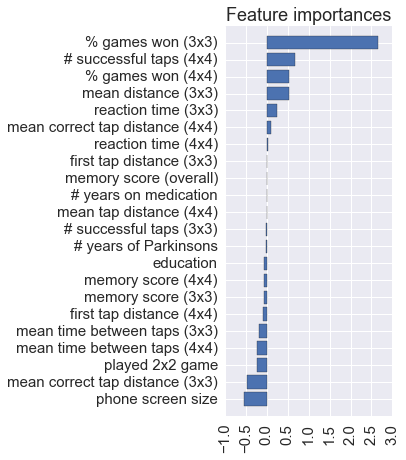

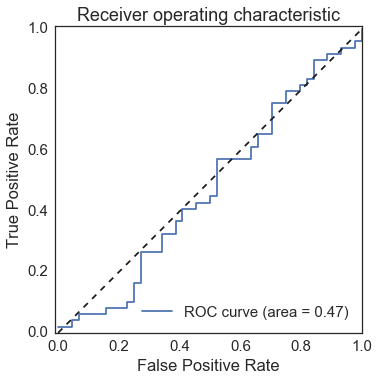

In [246]:
### 1.5th method: predict across all patients, taking mean values for tookmeds and didn't take meds for each person, and include nyears with parkinsons columns as features

labelcol = 'medTimepoint'
label_T = True
label_F = False
df = data

# 1. take parkinsons cohort
dfmed = df[df['hasParkinsons']==True].copy()

# 2. convert medTimePoint to #'s:
dfmed = mt.convert_features_to_numbers(dfmed)#, featuresToConvert=['medTimepoint'])

# 3. remove the ones that are nan in the medTimePoint column
dfmed = dfmed[dfmed[labelcol].notnull()]

# 4. split into yes and no took meds (medTimePoint) dfs
dfmed_T = dfmed[dfmed[labelcol]==label_T]
dfmed_F = dfmed[dfmed[labelcol]==label_F]

## 5. in each group, take mean (or 1 sample) per patient
dfmed_T = mt.groupby_col_and_avg_other_cols(dfmed_T, 'healthCode', keepColinDf=True)
dfmed_F = mt.groupby_col_and_avg_other_cols(dfmed_F, 'healthCode', keepColinDf=True)

# 6. recombine the mean/sampled datasets (& redo index so it's unique)
#dfmed_T['education']
dfmed = dfmed_T.append(dfmed_F)
dfmed.index = range(len(dfmed))
# 7. only include patients that have both states??

# 8. put into machine learning to predict medTimePoint
print 'shape of current dataframe: ', dfmed.shape

print dfmed[labelcol].sum()
print len(dfmed[labelcol])


# logistic regression, mean values

# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + fcats['demographic'] + fcats['phone'] + ['medTimepoint'] + ['nyearsOnMeds', 'nyearsParkinsons'] 
features.remove('smartphone')
features.remove('gender')
features.remove('age')
features.remove('16_numunsuccesses')
features.remove('9_numunsuccesses')
features.remove('game_numGames')
features.remove('game_numFails')
MLexcludecols = []
print features
# remove young patients:
dfmedsample = dfmed[dfmed['age']>agecutoff]
dfmedsample.shape


outs = mt.build_ML_model(dfmedsample, features, labelcol=labelcol, toPlot=[0,1,1], toPrint=True, MLexcludecols=MLexcludecols, modelType='logisticregression')
#model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
#print features


### 2nd method: predict for records of one individual who played the game many times

Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
In 226 records, the patient took meds
In 37 records, the patient didn't take meds
Features converted to numbers:
[]
dropped 0 rows to remove all nas from data
na rows have been dropped (if there were any)


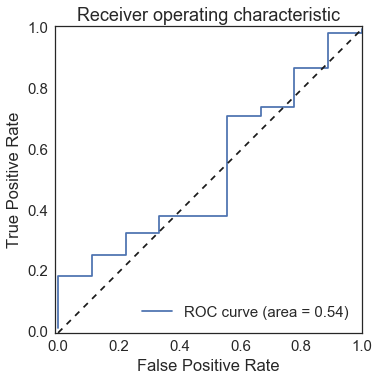

In [166]:
labelcol = 'medTimepoint'
label_T = True
label_F = False
df = data


# 1. take parkinsons cohort
dfmed = df[df['hasParkinsons']==True].copy()
# 1.1 Determine the # plays per person
numplays = dfmed['healthCode'].value_counts()
#print numplays
# 1.2 Pick a person with many plays
nPlays = numplays.max()
goodId = numplays[numplays == nPlays].index.tolist()[0]
#print goodId
# 1.3 cut data to only that person
dfmed = dfmed[dfmed['healthCode']==goodId]

# 2. convert categorical cols to #'s (so medTimePoint is converted)
dfmed = mt.convert_features_to_numbers(dfmed)
# 3. remove the ones that are nan in the medTimePoint column
dfmed = dfmed[dfmed[labelcol].notnull()]
# 4. split into yes and no took meds (medTimePoint) dfs
dfmed_T = dfmed[dfmed[labelcol]==label_T]
dfmed_F = dfmed[dfmed[labelcol]==label_F]
print 'In %s records, the patient took meds' % dfmed_T.shape[0]
print 'In %s records, the patient didn\'t take meds' % dfmed_F.shape[0]
# 6. recombine the datasets (& redo index so it's unique)
dfmed = dfmed_T.append(dfmed_F)
dfmed.index = range(len(dfmed))

## 7. only include patients that have both states??
#
## 8. put into machine learning to predict medTimePoint

# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + fcats['demographic'] + fcats['phone'] + ['medTimepoint']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
#features.remove('16_numunsuccesses')
#features.remove('9_numunsuccesses')
#features.remove('game_numGames')
#features.remove('game_numFails')
MLexcludecols = []
#print features

outs = mt.build_ML_model(dfmed, features, labelcol=labelcol, toPlot=[0,0,1], toPrint=False, MLexcludecols=MLexcludecols, modelType='logisticregression')
#model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
#print features
#numplays

### 2.5th method: loop through different individuals, predict each one meds vs no meds (nope, not predictive)

Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
In 226 records, the patient took meds
In 37 records, the patient didn't take meds
Features converted to numbers:
[]
dropped 0 rows to remove all nas from data
na rows have been dropped (if there were any)
Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
In 18 records, the patient took meds
In 47 records, the patient didn't take meds
Features converted to numbers:
[]
dropped 1 rows to remove all nas from data
na rows have been dropped (if there were any)
Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
In 105 records, the patient took meds
In 9 records, the patient didn't take meds
Features converted to numbers:
[]
dropped 0 rows to remove all nas from data
na rows have bee

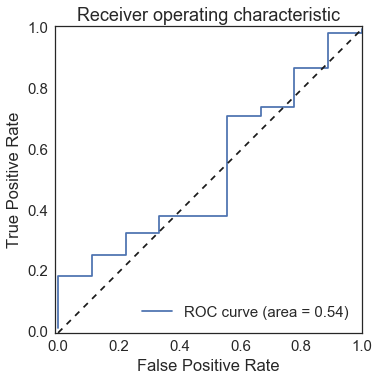

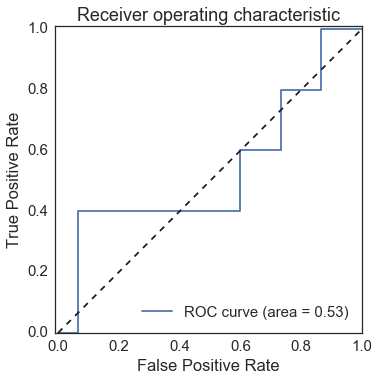

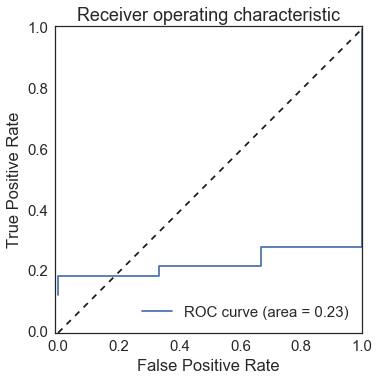

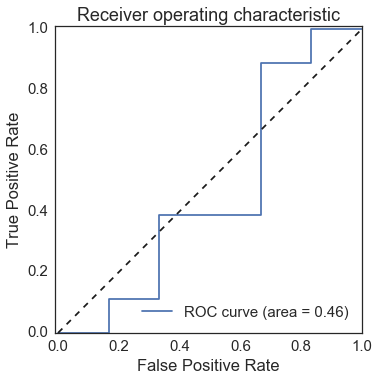

In [163]:
labelcol = 'medTimepoint'
label_T = True
label_F = False
df = data


# 1. take parkinsons cohort
dfmed = df[df['hasParkinsons']==True].copy()
# 1.1 Determine the # plays per person
numplays = dfmed['healthCode'].value_counts()
#print numplays
# 1.2 Loop through people starting with the one with the most plays:


dfmed_in = dfmed.copy()
for goodId in numplays.index:
    
    #nPlays = numplays.max()
    #goodId = numplays[numplays == nPlays].index.tolist()[0]
#    print goodId
    if numplays[goodId] > 150:
        # 1.3 cut data to only that person
        dfmed = dfmed_in[dfmed_in['healthCode']==goodId]

        # 2. convert categorical cols to #'s (so medTimePoint is converted)
        dfmed = mt.convert_features_to_numbers(dfmed)
        # 3. remove the ones that are nan in the medTimePoint column
        dfmed = dfmed[dfmed[labelcol].notnull()]
        # 4. split into yes and no took meds (medTimePoint) dfs
        dfmed_T = dfmed[dfmed[labelcol]==label_T]
        dfmed_F = dfmed[dfmed[labelcol]==label_F]
        print 'In %s records, the patient took meds' % dfmed_T.shape[0]
        print 'In %s records, the patient didn\'t take meds' % dfmed_F.shape[0]
        # 6. recombine the datasets (& redo index so it's unique)
        dfmed = dfmed_T.append(dfmed_F)
        dfmed.index = range(len(dfmed))

        ## 7. only include patients that have both states??
        #
        ## 8. put into machine learning to predict medTimePoint

        # simplified code when not sample balancing:
        # (with other memory features)
        # take only one record per patient to remove duplicates. mean is better, but that's later..

        features = fcats['game'] + fcats['demographic'] + fcats['phone'] + ['medTimepoint']
        features.remove('smartphone')
        features.remove('gender')
        features.remove('age')
        #features.remove('16_numunsuccesses')
        #features.remove('9_numunsuccesses')
        #features.remove('game_numGames')
        #features.remove('game_numFails')
        MLexcludecols = []
        #print features

        outs = mt.build_ML_model(dfmed, features, labelcol=labelcol, toPlot=[0,0,1], toPrint=False, MLexcludecols=MLexcludecols, modelType='logisticregression')
        #model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
        #print features



### try another output than medTimepoint (brainStim), and compare False vs True:

Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
shape of current dataframe:  (321, 61)
num positives in labelcol:  34.0
total length of labelcol:  321
['game_score', '9_numsuccesses', '9_meandist', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '9_meansuccessfuldist', '16_firstdist', '16_meandist', '16_numsuccesses', '16_gamescore', '16_latency', '16_meanDt', '16_meansuccessfuldist', 'played_game4', 'education', 'phoneInfo', 'medTimepoint', 'brainStim']
Features converted to numbers:
[]
brainStim converted to int
dropped 90 rows to remove all nas from data
na rows have been dropped (if there were any)


array([ 1.,  0.])

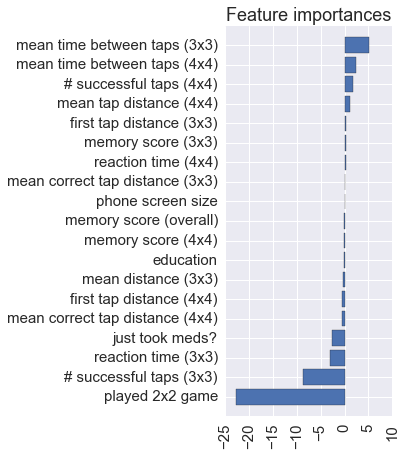

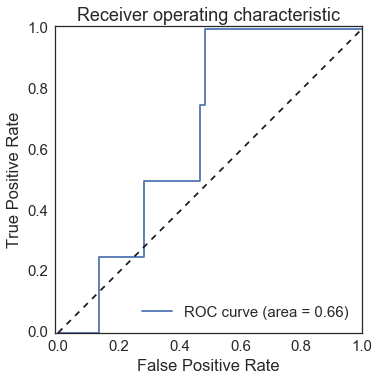

In [271]:
labelcol = 'brainStim'
label_T = True
label_F = False
df = data

# 0. remove nulls from labelcol
df = df[df[labelcol].notnull()] # remove null rows

# 1. take parkinsons cohort
dfmed = df[df['hasParkinsons']==True].copy()
# 2. convert medTimePoint to #'s:
dfmed = mt.convert_features_to_numbers(dfmed)#, featuresToConvert=['medTimepoint'])
# 3. remove the ones that are nan in the labelcol column
dfmed = dfmed[dfmed[labelcol].notnull()]
#print dfmed[labelcol].unique()

# 4. split into yes and no took meds (medTimePoint) dfs
dfmed_T = dfmed[dfmed[labelcol]==label_T]
dfmed_F = dfmed[dfmed[labelcol]==label_F]

# 4.5 make sure that the labelcol is completely numeric, so it won't be dropped by buggy(?) pandas:
#dfmed_T[labelcol] = dfmed_T[labelcol].copy().astype(int)
#dfmed_F[labelcol] = dfmed_F[labelcol].copy().astype(int)
dfmed_F.loc[:, labelcol] = dfmed_F[labelcol].astype(int)
dfmed_T.loc[:, labelcol] = dfmed_T[labelcol].astype(int)

## 5. in each group, take mean (or 1 sample) per patient
# ! this won't run with non-numeric vals in the column. 
dfmed_T = mt.groupby_col_and_avg_other_cols(dfmed_T, 'healthCode', keepColinDf=True)
dfmed_F = mt.groupby_col_and_avg_other_cols(dfmed_F, 'healthCode', keepColinDf=True)

# 6. recombine the mean/sampled datasets (& redo index so it's unique)
#dfmed_T['education']
dfmed = dfmed_T.append(dfmed_F)
dfmed.index = range(len(dfmed))

# 7. only include patients that have both states??

# 8. put into machine learning to predict medTimePoint
print 'shape of current dataframe: ', dfmed.shape

print 'num positives in labelcol: ', dfmed[labelcol].sum()
print 'total length of labelcol: ', len(dfmed[labelcol])


# logistic regression, mean values

# simplified code when not sample balancing:
# (with other memory features)
# take only one record per patient to remove duplicates. mean is better, but that's later..

features = fcats['game'] + fcats['demographic'] + fcats['phone'] + ['medTimepoint'] + ['brainStim']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
features.remove('16_numunsuccesses')
features.remove('9_numunsuccesses')
features.remove('game_numGames')
features.remove('game_numFails')
features.remove('9_successful')
features.remove('16_successful')


MLexcludecols = []
print features
# remove young patients:
dfmedsample = dfmed[dfmed['age']>agecutoff]
dfmedsample.shape


outs = mt.build_ML_model(dfmedsample, features, labelcol=labelcol, toPlot=[0,1,1], toPrint=False, MLexcludecols=MLexcludecols, modelType='logisticregression')
#model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
#print features

dfmedsample[labelcol].unique()
#data['brainStim'].unique()

In [ ]:
# try again taking 1 sample per, and looping?

In [ ]:
# do for another output:

In [ ]:
# surgery won't work - not enough positive samples

In [202]:
# try predicting the # of years of parkinsons:
# (1. discretize it, & do logistic regression)

Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
unique label vals are: [ 1.  0.]
['game_score', '9_numsuccesses', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '9_meansuccessfuldist', '16_firstdist', '16_meandist', '16_numsuccesses', '16_gamescore', '16_latency', '16_successful', '16_meanDt', '16_meansuccessfuldist', 'played_game4', 'education', 'phoneInfo', 'medTimepoint', 'nyearsParkinsons', 'healthCode']
Features converted to numbers:
[]
dropped 3469 rows to remove all nas from data
# positive in labelcol:  63.0
# total in labelcol:  208
na rows have been dropped (if there were any)


array([ 1.,  0.])

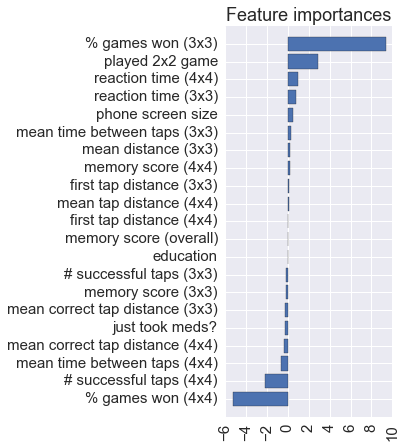

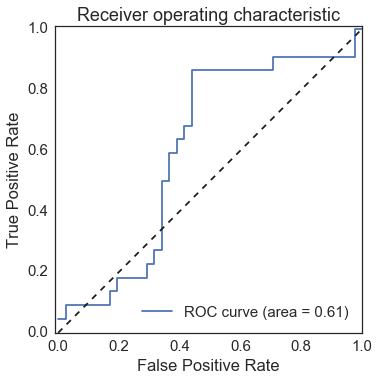

In [203]:
labelcol = 'nyearsParkinsons'
#labelcol = 'nyearsOffMeds'
#label_T = True
#label_F = False
df = data

# 0. remove nulls from labelcol
df = df[df[labelcol].notnull()] # remove null rows

# 0.5 try discretizing it, and run logistic regression (if promising, do linear regression on vals)
nyearsCutoff = 10
df.loc[df[labelcol]<nyearsCutoff,labelcol] = 0
df.loc[df[labelcol]>=nyearsCutoff,labelcol] = 1
# 1. take parkinsons cohort
dfmed = df[df['hasParkinsons']==True].copy()

# 2. convert labelcol to #'s:
dfmed = mt.convert_features_to_numbers(dfmed)#, featuresToConvert=['medTimepoint'])

# 3. remove the ones that are nan in the labelcol column
dfmed = dfmed[dfmed[labelcol].notnull()]
print 'unique label vals are:', dfmed[labelcol].unique()

# define features:

features = fcats['game'] + fcats['demographic'] + fcats['phone'] + ['medTimepoint'] + [labelcol] + ['healthCode']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
features.remove('16_numunsuccesses')
features.remove('9_numunsuccesses')
features.remove('game_numGames')
features.remove('game_numFails')

featureToMean = ['healthCode'] # don't need to also exclude - this step takes care of that too.
MLexcludecols = []
print features
# remove young patients:
dfmedsample = dfmed[dfmed['age']>agecutoff]
dfmedsample.shape

# logistic (later linear) regression:


outs = mt.build_ML_model(dfmedsample, features, labelcol=labelcol, toPlot=[0,1,1], toPrint=False, MLexcludecols=MLexcludecols, modelType='logisticregression', featureToMean=featureToMean)
#model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, train_acc, test_acc, rand_acc, y_pred, y_pred_proba = outs   
#print features

dfmedsample[labelcol].unique()
#data['brainStim'].unique()

In [ ]:
# that worked, for some cutoffs...
# try predicting the # of years of parkinsons:
# (2. do linear regression)

In [239]:
# continuous label (do linear regression):

labelcol = 'nyearsParkinsons'
#labelcol = 'nyearsOffMeds'
#label_T = True
#label_F = False
df = data

# -1. remove the 47 years old timepoint (probably an error)
df.loc[df[labelcol]>30,labelcol] = nan

# 0. remove nulls from labelcol
df = df[df[labelcol].notnull()] # remove null rows


# 1. take parkinsons cohort
dfmed = df[df['hasParkinsons']==True].copy()

# 2. convert labelcol to #'s:
dfmed = mt.convert_features_to_numbers(dfmed)#, featuresToConvert=['medTimepoint'])

# 3. remove the ones that are nan in the labelcol column
dfmed = dfmed[dfmed[labelcol].notnull()]
print 'unique label vals are:', dfmed[labelcol].unique()

# define features:

features = fcats['game'] + fcats['demographic'] + fcats['phone'] + ['medTimepoint'] + [labelcol] + ['healthCode']
features.remove('smartphone')
features.remove('gender')
features.remove('age')
features.remove('16_numunsuccesses')
features.remove('9_numunsuccesses')
features.remove('game_numGames')
features.remove('game_numFails')

featureToMean = ['healthCode'] # don't need to also exclude - this step takes care of that too.
MLexcludecols = []
print features
# remove young patients:
dfmedsample = dfmed[dfmed['age']>agecutoff]
dfmedsample.shape



Features converted to numbers:
['smartphone', 'gender', 'phoneUsage', 'medTimepoint', 'phoneInfo', 'education']
brainStim converted to int
unique label vals are: [ 18.  10.   5.   8.   4.   3.   2.  13.   6.   7.  15.   9.  16.  11.  12.
  17.  14.  19.  23.]
['game_score', '9_numsuccesses', '9_meandist', '9_successful', '9_gamescore', '9_latency', '9_firstdist', '9_meanDt', '9_meansuccessfuldist', '16_firstdist', '16_meandist', '16_numsuccesses', '16_gamescore', '16_latency', '16_successful', '16_meanDt', '16_meansuccessfuldist', 'played_game4', 'education', 'phoneInfo', 'medTimepoint', 'nyearsParkinsons', 'healthCode']


(6060, 82)

Features converted to numbers:
[]
dropped 3468 rows to remove all nas from data
# positive in labelcol:  1573.0
# total in labelcol:  207
na rows have been dropped (if there were any)


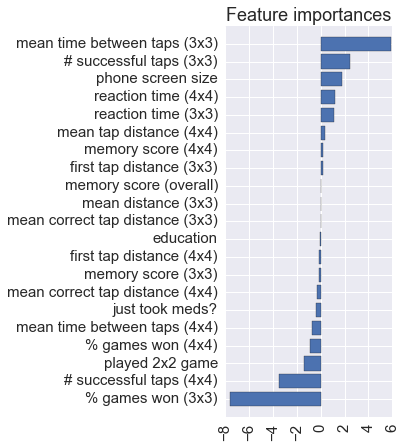

In [240]:
#linear regression:


outs = mt.build_ML_regression(dfmedsample, features, labelcol=labelcol, toPlot=[1], MLexcludecols=MLexcludecols, modelType='linearregression', featureToMean=featureToMean)
model, fdf, X, y, X_names, y_name, X_train, X_test, y_train, y_test, y_pred, y_pred_train = outs


training r^2:  0.252402278833
testing r^2:  -0.436870556183


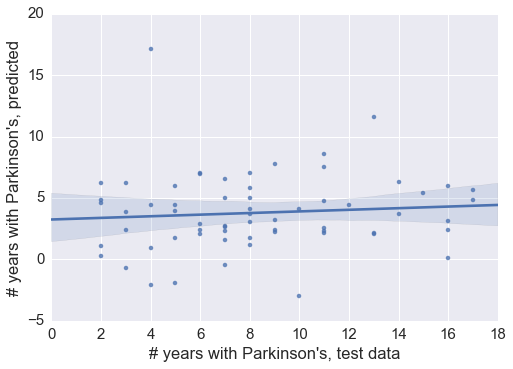

In [244]:
#sns.regplot(y_test, y_pred - y_test)
sns.regplot(y_test, y_pred + model.intercept_)
plt.xlabel('# years with Parkinson\'s, test data')
plt.ylabel('# years with Parkinson\'s, predicted')           
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print 'training r^2: ', r2_score(y_train, y_pred_train)
print 'testing r^2: ', r2_score(y_test, y_pred)



In [226]:
model.coef_

array([  3.01856470e-02,   2.46030032e+00,   2.22240798e-03,
        -7.54344869e+00,  -1.50830682e-01,   1.08319086e+00,
         1.59806134e-01,   5.86890790e+00,   1.53674944e-03,
        -1.43949949e-01,   3.50910964e-01,  -3.52027407e+00,
         1.84678487e-01,   1.23200381e+00,  -8.67932706e-01,
        -6.83995381e-01,  -2.88008443e-01,  -1.42542761e+00,
        -5.25622135e-02,   1.76188241e+00,  -3.65758328e-01])

In [14]:
# Try putting the outputs in as features for predicting med timepoint 